# Permutation Importance

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/Nikhil/AppData/Local/Temp/Temp1_train.csv.zip/train.csv')

In [3]:
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [20]:
a = data.drop(['key','pickup_datetime'],axis=1)

<Figure size 3600x2880 with 0 Axes>

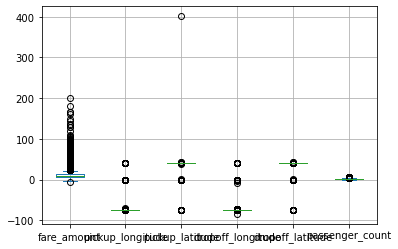

In [44]:
plt.figure(figsize=(50,40))
a.plot(kind='box')
plt.grid()

In [45]:
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

In [46]:
base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'passenger_count']

In [51]:
x = data[base_features]

In [52]:
y = data[['fare_amount']]

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [56]:
model = RandomForestRegressor(n_estimators = 50, random_state=1)

In [57]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=1)

In [58]:
x_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,23466.000000,23466.000000,23466.000000,23466.000000,23466.000000
mean,-73.976827,40.756931,-73.975359,40.757434,1.662320
std,0.014625,0.018206,0.015930,0.018659,1.290729
min,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,-73.987964,40.744901,-73.987143,40.745756,1.000000
50%,-73.979629,40.758076,-73.978588,40.758542,1.000000
75%,-73.967797,40.769602,-73.966459,40.770406,2.000000
max,-73.900062,40.799952,-73.900062,40.799999,6.000000


In [59]:
y_train.describe()

,fare_amount
count,23466.000000
mean,8.472539
std,4.609747
min,0.010000
25%,5.500000
50%,7.500000
75%,10.100000
max,165.000000


In [61]:
pip install eli5

  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=de32b5d6b9172aed8421ea4c7043871f73a79f090437d75694b79a12c9fbae52
  Stored in directory: c:\users\nikhil\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires Jinja2<3.0.0, but you have jinja2 3.1.2 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.2 which is incompatible.


  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [63]:
import eli5

In [64]:
from eli5.sklearn import PermutationImportance

In [65]:
perm = PermutationImportance(model, random_state=1)

In [66]:
perm.fit(x_test,y_test)

PermutationImportance(estimator=RandomForestRegressor(n_estimators=50,
                                                      random_state=1),
                      random_state=1)

In [67]:
eli5.show_weights(perm, feature_names= x_test.columns.tolist())

Weight,Feature
0.8426 ± 0.0168,dropoff_latitude
0.8269 ± 0.0211,pickup_latitude
0.5943 ± 0.0436,pickup_longitude
0.5387 ± 0.0273,dropoff_longitude
-0.0020 ± 0.0013,passenger_count


In [68]:
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

In [69]:
perm2 = PermutationImportance(second_model,random_state=1)

In [71]:
perm2.fit(new_val_X,new_val_y)

PermutationImportance(estimator=RandomForestRegressor(n_estimators=30,
                                                      random_state=1),
                      random_state=1)

In [73]:
eli5.show_weights(perm2,feature_names=new_val_X.columns.tolist())

Weight,Feature
0.5979 ± 0.0625,abs_lat_change
0.4485 ± 0.0503,abs_lon_change
0.0810 ± 0.0240,pickup_latitude
0.0766 ± 0.0121,dropoff_latitude
0.0709 ± 0.0103,pickup_longitude
0.0596 ± 0.0135,dropoff_longitude


# Partial PLots

In [74]:
from sklearn.inspection import PartialDependenceDisplay

In [97]:
PartialDependenceDisplay.from_estimator(model, x_test, [feat_name])

AttributeError: type object 'PartialDependenceDisplay' has no attribute 'from_estimator'

# SHAP Value

In [7]:
hs = pd.read_csv('C:/Users/Nikhil/AppData/Local/Temp/Temp1_train.csv (1).zip/train.csv')

In [8]:
hs

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2,85,0,12,0,0,0,9,True,False,...,True,False,True,True,True,True,True,False,True,0
24996,5,35,2,15,0,0,0,9,False,True,...,True,True,True,True,True,True,True,True,True,1
24997,3,10,1,23,1,0,0,4,True,False,...,True,False,True,True,True,True,True,False,True,1
24998,8,69,3,41,1,0,0,9,True,False,...,True,True,False,True,True,True,True,False,True,1


In [9]:
best_features = [c for c in hs.columns if c != 'readmitted' and hs[c].dtypes==('int64','float64')]

In [10]:
best_features

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [11]:
x = hs[best_features]
y = (hs['readmitted']==1)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=30, random_state=1)
my_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=1)

In [27]:
x_train.shape

(18750, 8)

In [14]:
x_test.shape

(6250, 8)

In [15]:
data_for_prediction = x_test.iloc[0,:]

In [16]:
data_for_prediction

time_in_hospital       2
num_lab_procedures    31
num_procedures         4
num_medications       19
number_outpatient      0
number_emergency       0
number_inpatient       0
number_diagnoses       9
Name: 21492, dtype: int64

In [17]:
data_for_prediction_array = data_for_prediction.values.reshape(1,-1)

In [18]:
data_for_prediction_array

array([[ 2, 31,  4, 19,  0,  0,  0,  9]], dtype=int64)

In [19]:
my_model.predict_proba(data_for_prediction_array)

array([[0.53333333, 0.46666667]])

In [1]:
pip install shap

     ------------------------------------- 435.6/435.6 kB 76.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import shap

In [20]:
explainer = shap.TreeExplainer(my_model)

In [21]:
shap_values = explainer.shap_values(data_for_prediction)

In [23]:
shap_values

[array([ 0.01587701, -0.0351071 ,  0.02917297, -0.03701571,  0.01449545,
         0.01318384,  0.04859731, -0.06202688]),
 array([-0.01587701,  0.0351071 , -0.02917297,  0.03701571, -0.01449545,
        -0.01318384, -0.04859731,  0.06202688])]

In [22]:
shap.initjs()

In [24]:
shap.force_plot(explainer.expected_value[1],shap_values[1],data_for_prediction)

In [28]:
shap_values1 = explainer.shap_values(x_test)

In [41]:
shap_values1[1]

array([[-0.01587701,  0.0351071 , -0.02917297, ..., -0.01318384,
        -0.04859731,  0.06202688],
       [ 0.00320718, -0.03004971,  0.02860784, ..., -0.01595003,
        -0.07233301,  0.09483164],
       [ 0.06441729,  0.06847   ,  0.03979578, ..., -0.00990796,
        -0.02344533,  0.09574531],
       ...,
       [ 0.00230303,  0.02940355,  0.05986611, ..., -0.01454243,
        -0.04526842,  0.01061756],
       [-0.02676864, -0.03515303, -0.09353277, ...,  0.11867888,
        -0.06442506,  0.04999669],
       [ 0.03520874,  0.04557742, -0.04844424, ..., -0.01898722,
        -0.0608335 , -0.06123383]])

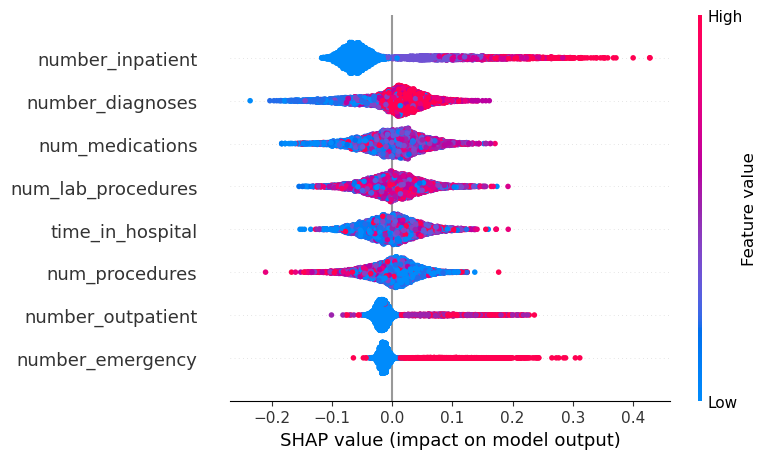

In [44]:
shap.summary_plot(shap_values1[1],x_test)

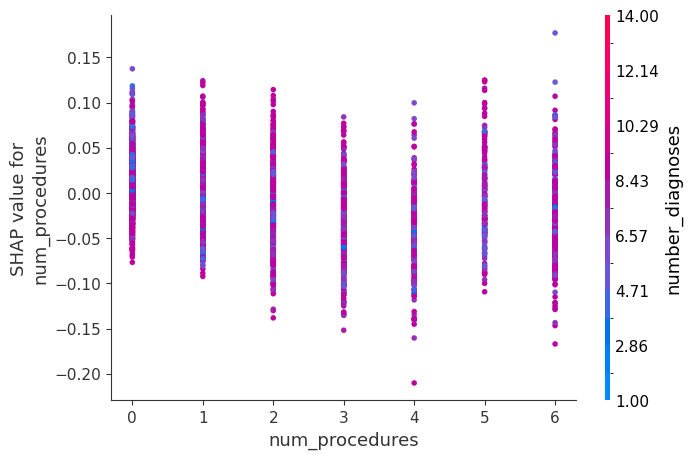

In [43]:
shap.dependence_plot('num_procedures',shap_values1[1],x_test,interaction_index='number_diagnoses')